In [547]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
# load player data
df_player_info = pd.read_csv("https://raw.githubusercontent.com/enesyesil/Moneyball-Scout-ML/main/top5_leagues_player.csv")
df_player_info.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


In [549]:
# clean player data
df_player_info = df_player_info.drop(
    [
        "Unnamed: 0",
        "full_name",
        "nationality",
        "place_of_birth",
        "shirt_nr",
        "foot",
        "club",
        "contract_expires",
        "joined_club",
        "player_agent",
        "outfitter",
    ],
    axis=1,
)
df_player_info.head()

,name,age,height,price,max_price,position,league
0,Ederson,29,1.88,45.00,70.0,Goalkeeper,EPL
1,Stefan Ortega,30,1.85,6.00,6.0,Goalkeeper,EPL
2,Scott Carson,37,1.88,0.25,6.0,Goalkeeper,EPL
3,Rúben Dias,26,1.87,75.00,75.0,Defender - Centre-Back,EPL
4,Nathan Aké,28,1.80,35.00,40.0,Defender - Centre-Back,EPL


In [550]:
# load and clean more data
df_atmid_wingers = pd.read_csv("https://raw.githubusercontent.com/enesyesil/Moneyball-Scout-ML/main/AtMid_Wingers.csv")
df_centerbacks = pd.read_csv("https://raw.githubusercontent.com/enesyesil/Moneyball-Scout-ML/main/CenterBacks.csv")
df_forwards = pd.read_csv("https://raw.githubusercontent.com/enesyesil/Moneyball-Scout-ML/main/Forwards.csv")
df_fullbacks = pd.read_csv("https://raw.githubusercontent.com/enesyesil/Moneyball-Scout-ML/main/FullBacks.csv")
df_midfielders = pd.read_csv("https://raw.githubusercontent.com/enesyesil/Moneyball-Scout-ML/main/Midfielders.csv")
df_name_db = pd.read_csv("https://raw.githubusercontent.com/enesyesil/Moneyball-Scout-ML/main/NAME_DB.csv")

df_merged = pd.concat(
    [
        df_atmid_wingers,
        df_centerbacks,
        df_forwards,
        df_fullbacks,
        df_midfielders,
        df_name_db,
    ],
    ignore_index=True,
)
df_merged = df_merged.drop(["Unnamed: 0", "Links"], axis=1)
df_merged = df_merged.rename(
    columns={
        "Name": "name",
        "Attribute Vector": "attribute-vector",
        "Percentiles": "percentiles",
    }
)

# remove players with missing data (attribute-vector & percentiles = nan)
df_merged = df_merged.dropna(axis=0, thresh=2)

df_merged

,name,attribute-vector,percentiles
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,..."
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4..."
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8..."
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7..."
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,..."
...,...,...,...
1836,Martín Zubimendi,"[0.03, 0.05, 0.36, 0.08, 0.05, 0.1, 1.48, 52.8...","[25, 33, 8, 48, 25, 25, 13, 58, 71, 52, 49, 12..."
1837,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57..."
1838,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57..."
1839,Martin Ødegaard,"[0.4, 0.27, 2.56, 0.19, 0.26, 0.53, 4.81, 52.0...","[99, 99, 99, 86, 98, 99, 99, 57, 39, 90, 86, 8..."


In [551]:
# get attribute names
non_gk_names = [
    "Non-Penalty Goals",
    "Non-Penalty xG",
    "Shots Total",
    "Assists",
    "xAG",
    "npxG + xAG",
    "Shot-Creating Actions",
    "Passes Attempted",
    "Pass Completion %",
    "Progressive Passes",
    "Progressive Carries",
    "Successful Take-Ons",
    "Touches (Att Pen)",
    "Progressive Passes Rec",
    "Tackles",
    "Interceptions",
    "Blocks",
    "Clearances",
    "Aerials won",
]

# add attributes as columns
for col in non_gk_names:
    df_merged.insert(len(df_merged.columns), col.lower().replace(" ", "-"), np.nan)

df_merged.head()

,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,progressive-passes,progressive-carries,successful-take-ons,touches-(att-pen),progressive-passes-rec,tackles,interceptions,blocks,clearances,aerials-won
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [552]:
# load data into new attributes
for row in df_merged.index:
    vectors = df_merged["attribute-vector"][row]
    # cover nan
    if type(vectors) == float:
        continue

    # remove leading/trailing '[' and ']' and split
    vector_strs = vectors[1:-1].split(", ")
    for col in range(len(vector_strs)):
        df_merged.iat[row, col+3] = float(vector_strs[col])

df_merged.head()

,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,progressive-passes,progressive-carries,successful-take-ons,touches-(att-pen),progressive-passes-rec,tackles,interceptions,blocks,clearances,aerials-won
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",0.04,0.15,1.56,0.11,0.16,0.31,3.60,...,3.26,1.63,1.29,2.73,5.73,1.71,0.19,1.63,0.23,0.30
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",0.36,0.42,3.02,0.18,0.12,0.54,2.91,...,2.62,3.64,1.53,5.46,10.04,1.20,0.80,0.66,0.84,0.44
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",0.41,0.31,2.45,0.26,0.25,0.56,3.88,...,2.86,3.68,2.25,4.44,8.27,0.87,0.46,1.07,0.20,0.56
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",0.34,0.33,2.40,0.15,0.13,0.46,4.16,...,3.13,3.08,1.96,4.40,9.20,1.37,0.39,1.86,0.44,1.96
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",0.06,0.09,0.88,0.00,0.04,0.12,2.04,...,2.68,0.82,0.35,1.63,4.96,0.70,0.41,0.82,0.53,0.58


In [553]:
# merge player info and merged data
df_final = pd.merge(df_merged, df_player_info, on="name", how="left")

# remove duplicates and goalkeepers (only using non-gk players)
df_final = df_final.drop_duplicates()
df_final.drop(df_final[df_final["position"] == "Goalkeeper"].index, inplace=True)

# drop players with NaN position or NaN price
df_final.dropna(subset=["position"], inplace=True)
df_final.dropna(subset=["price"], inplace=True)

df_final

,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,interceptions,blocks,clearances,aerials-won,age,height,price,max_price,position,league
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",0.04,0.15,1.56,0.11,0.16,0.31,3.60,...,0.19,1.63,0.23,0.30,22.0,1.77,30.0,30.0,midfield - Attacking Midfield,Other
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",0.36,0.42,3.02,0.18,0.12,0.54,2.91,...,0.80,0.66,0.84,0.44,23.0,1.79,7.0,7.0,Attack - Right Winger,Ligue1
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",0.41,0.31,2.45,0.26,0.25,0.56,3.88,...,0.46,1.07,0.20,0.56,21.0,1.80,35.0,35.0,Attack - Left Winger,Bundesliga
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",0.34,0.33,2.40,0.15,0.13,0.46,4.16,...,0.39,1.86,0.44,1.96,23.0,1.74,15.0,15.0,Attack - Left Winger,Bundesliga
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",0.06,0.09,0.88,0.00,0.04,0.12,2.04,...,0.41,0.82,0.53,0.58,26.0,1.83,3.5,5.5,midfield - Central Midfield,SerieA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,Ryan Yates,"[0.0, 0.11, 1.27, 0.1, 0.06, 0.17, 1.18, 29.0,...","[12, 73, 69, 58, 32, 51, 5, 3, 20, 2, 12, 4, 6...",0.00,0.11,1.27,0.10,0.06,0.17,1.18,...,0.49,1.27,2.16,1.42,25.0,1.90,8.0,8.0,midfield - Central Midfield,Other
1838,Denis Zakaria,"[0.15, 0.04, 0.44, 0.0, 0.01, 0.06, 0.74, 38.6...","[78, 28, 13, 8, 2, 9, 1, 21, 95, 1, 81, 50, 27...",0.15,0.04,0.44,0.00,0.01,0.06,0.74,...,1.04,0.89,1.78,0.00,26.0,1.90,20.0,45.0,midfield - Defensive Midfield,EPL
1841,Oier Zarraga,"[0.0, 0.14, 1.9, 0.0, 0.12, 0.25, 2.64, 40.04,...","[12, 81, 90, 8, 67, 76, 62, 26, 23, 27, 48, 33...",0.00,0.14,1.90,0.00,0.12,0.25,2.64,...,1.06,0.74,0.53,0.95,24.0,1.75,3.0,3.5,midfield - Central Midfield,LaLiga
1843,Martín Zubimendi,"[0.03, 0.05, 0.36, 0.08, 0.05, 0.1, 1.48, 52.8...","[25, 33, 8, 48, 25, 25, 13, 58, 71, 52, 49, 12...",0.03,0.05,0.36,0.08,0.05,0.10,1.48,...,1.27,1.27,1.59,1.72,24.0,1.81,40.0,40.0,midfield - Defensive Midfield,LaLiga



## Key Metrics For Positions

To evaluate the importance of each attribute for specific football positions, let's break down which metrics are particularly crucial for attacking midfielders, centre backs, fullbacks, midfielders, defensive midfielders, wingers, and strikers. These metrics help in understanding the players' contribution to the team beyond traditional stats.

### Attacking Midfielders
1. Non-Penalty Goals & Non-Penalty xG
2. Assists & xAG
3. Shot-Creating Actions
4. Passes Attempted & Pass Completion %
5. Progressive Passes & Progressive Carries
6. Touches (Att Pen)

### Centre Backs
1. Tackles, Interceptions,Blocks, Clearances
2. Aerials won
3. Passes Attempted & Pass Completion %
4. Progressive Passes

### Fullbacks
1. Assists & xAG
2. Progressive Passes & Progressive Carries
3. Successful Take-Ons
4. Tackles, Interceptions, Blocks

### Midfielders (Central/Box-to-Box)
1. Passes Attempted & Pass Completion %, Progressive Passes
2. Shot-Creating Actions
3. Tackles & Interceptions
4. Progressive Carries & Successful Take-Ons

### Defensive Midfielders
1. Tackles, Interceptions, Blocks
2. Passes Attempted & Pass Completion %
3. Progressive Passes
4. Aerials won

### Wingers
1. Non-Penalty Goals & Non-Penalty xG
2. Assists & xAG
3. Shot-Creating Actions & Progressive Carries
4. Successful Take-Ons & Touches (Att Pen)

### Strikers
1. Non-Penalty Goals & Non-Penalty xG
2. Assists & xAG
3. Shots Total
4. Touches (Att Pen)
5. Aerials won

In [554]:
# cleanup positions
df_final['position'] = df_final['position'].str.replace('midfield - ', '', regex=False)
df_final['position'] = df_final['position'].str.replace('Attack - ', '', regex=False)
df_final['position'] = df_final['position'].str.replace('Defender - ', '', regex=False)

In [555]:
# create seperate dataframes for each position
df_amc = df_final[df_final['position'] == 'Attacking Midfield']

In [556]:
# Selected important columns for "Attacking Midfielders"
amc_columns = [
    'name','age','league','non-penalty-goals', 'non-penalty-xg', 'assists',
    'xag', 'shot-creating-actions', 'passes-attempted',
    'pass-completion-%', 'progressive-passes', 'successful-take-ons',
     'price','progressive-carries', 'progressive-passes-rec','npxg-+-xag','touches-(att-pen)','shots-total'
]

# Filtering for "Attacking Midfielder" players and selecting the 13 important columns
df_amc = df_amc[amc_columns]

df_amc


,name,age,league,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,progressive-passes,successful-take-ons,price,progressive-carries,progressive-passes-rec,npxg-+-xag,touches-(att-pen),shots-total
0,Brenden Aaronson,22.0,Other,0.04,0.15,0.11,0.16,3.60,30.24,74.3,3.26,1.29,30.0,1.63,5.73,0.31,2.73,1.56
12,Joe Aribo,26.0,EPL,0.15,0.11,0.00,0.06,1.99,28.31,72.7,2.87,1.25,15.0,1.40,4.71,0.17,3.38,1.03
18,Nedim Bajrami,24.0,SerieA,0.10,0.16,0.05,0.13,3.74,35.97,71.8,3.74,1.48,8.0,2.30,7.32,0.30,2.87,2.25
20,Tommaso Baldanzi,20.0,Other,0.20,0.12,0.00,0.09,3.05,32.86,82.5,3.50,1.17,10.0,2.90,4.77,0.21,2.34,1.68
33,Ludovic Blas,25.0,Ligue1,0.21,0.20,0.21,0.19,4.08,37.90,78.3,4.64,2.79,18.0,3.97,7.84,0.39,3.38,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,David Silva,37.0,LaLiga,0.12,0.16,0.20,0.15,3.82,55.88,84.8,7.52,0.94,4.0,3.31,5.78,0.31,3.38,1.30
1782,Kevin Stöger,29.0,Bundesliga,0.07,0.07,0.10,0.20,4.78,55.65,69.3,7.41,0.76,2.5,1.49,3.39,0.27,1.28,1.56
1783,Denis Suárez,29.0,LaLiga,0.00,0.05,0.00,0.10,3.24,43.05,73.2,4.10,1.81,5.0,2.48,3.24,0.15,1.14,0.38
1796,Kristian Thorstvedt,24.0,SerieA,0.16,0.17,0.08,0.09,2.22,38.66,76.2,4.75,0.55,8.5,2.46,4.28,0.25,2.85,1.58


In [557]:
important_columns_cb = [
    'name','age','tackles', 'interceptions', 'blocks', 'clearances',
    'aerials-won', 'passes-attempted', 'pass-completion-%', 'league','price','progressive-passes','progressive-carries'
]

important_columns_fb = [
    'name', 'assists', 'progressive-passes', 'successful-take-ons', 
    'tackles', 'interceptions', 'league','max_price'
]

important_columns_dm = [
    'name', 'tackles', 'interceptions', 'blocks', 'passes-attempted', 
    'pass-completion-%', 'progressive-passes','progressive-carries' , 'aerials-won', 'league','max_price'
]

important_columns_wg = [
    'name','age','price', 'non-penalty-goals', 'non-penalty-xg', 'assists', 'xag', 
    'successful-take-ons', 'shot-creating-actions', 'touches-(att-pen)', 'league',
]

important_columns_st = [
    'name','age','price', 'non-penalty-goals', 'non-penalty-xg', 'shots-total', 'assists', 
    'xag', 'touches-(att-pen)', 'aerials-won', 'league','shots-total','progressive-passes-rec','successful-take-ons','npxg-+-xag','shot-creating-actions'
    
]

important_columns_cm = [
    'name', 'passes-attempted', 'pass-completion-%', 'progressive-passes',
    'tackles', 'interceptions', 'shot-creating-actions', 'league','max_price'
]

important_columns_rm_lm = [
    'name', 'assists', 'successful-take-ons', 'tackles', 'interceptions',
    'passes-attempted', 'progressive-passes', 'shot-creating-actions', 'league','max_price'
]

df_cb = df_final[df_final['position'] == 'Centre-Back']
df_rb = df_final[df_final['position'] == 'Right-Back']
df_lb = df_final[df_final['position'] == 'Left-Back']
df_rm = df_final[df_final['position'] == 'Right Midfield']
df_lm = df_final[df_final['position'] == 'Left Midfield']
df_cf = df_final[df_final['position'] == 'Centre-Forward']
df_ss = df_final[df_final['position'] == 'Second Striker']
df_rw = df_final[df_final['position'] == 'Right Winger']
df_lw = df_final[df_final['position'] == 'Left Winger']
df_dm = df_final[df_final['position'] == 'Defensive Midfield']
df_cm = df_final[df_final['position'] == 'Central Midfield']

df_cm = df_cm[important_columns_cm]
df_dm = df_dm[important_columns_dm]
df_lw = df_lw[important_columns_wg]
df_rw = df_rw[important_columns_wg]
df_ss = df_ss[important_columns_st]
df_cf = df_cf[important_columns_st]
df_lm = df_lm[important_columns_rm_lm]
df_rm = df_rm[important_columns_rm_lm]
df_rb = df_rb[important_columns_fb]
df_lb = df_lb[important_columns_fb]
df_cb = df_cb[important_columns_cb]

 # Discovering and Visualizing Data

## Attacking Midfielder - - Data Discovery

In [558]:
from sklearn.preprocessing import StandardScaler

league_scores = {
    'EPL': 5, 
    'LaLiga': 4.5, 
    'Bundesliga': 3.5, 
    'SerieA': 3.0, 
    'Ligue1': 3.0, 
    'Other': 3
}

df_amc['league_score'] = df_amc['league'].map(league_scores)

df_amc

,name,age,league,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,progressive-passes,successful-take-ons,price,progressive-carries,progressive-passes-rec,npxg-+-xag,touches-(att-pen),shots-total,league_score
0,Brenden Aaronson,22.0,Other,0.04,0.15,0.11,0.16,3.60,30.24,74.3,3.26,1.29,30.0,1.63,5.73,0.31,2.73,1.56,3.0
12,Joe Aribo,26.0,EPL,0.15,0.11,0.00,0.06,1.99,28.31,72.7,2.87,1.25,15.0,1.40,4.71,0.17,3.38,1.03,5.0
18,Nedim Bajrami,24.0,SerieA,0.10,0.16,0.05,0.13,3.74,35.97,71.8,3.74,1.48,8.0,2.30,7.32,0.30,2.87,2.25,3.0
20,Tommaso Baldanzi,20.0,Other,0.20,0.12,0.00,0.09,3.05,32.86,82.5,3.50,1.17,10.0,2.90,4.77,0.21,2.34,1.68,3.0
33,Ludovic Blas,25.0,Ligue1,0.21,0.20,0.21,0.19,4.08,37.90,78.3,4.64,2.79,18.0,3.97,7.84,0.39,3.38,3.12,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,David Silva,37.0,LaLiga,0.12,0.16,0.20,0.15,3.82,55.88,84.8,7.52,0.94,4.0,3.31,5.78,0.31,3.38,1.30,4.5
1782,Kevin Stöger,29.0,Bundesliga,0.07,0.07,0.10,0.20,4.78,55.65,69.3,7.41,0.76,2.5,1.49,3.39,0.27,1.28,1.56,3.5
1783,Denis Suárez,29.0,LaLiga,0.00,0.05,0.00,0.10,3.24,43.05,73.2,4.10,1.81,5.0,2.48,3.24,0.15,1.14,0.38,4.5
1796,Kristian Thorstvedt,24.0,SerieA,0.16,0.17,0.08,0.09,2.22,38.66,76.2,4.75,0.55,8.5,2.46,4.28,0.25,2.85,1.58,3.0


In [559]:
# Define metrics to include in the Performance Index, excluding 'league_score' for now
metrics = ['non-penalty-goals', 'non-penalty-xg', 'assists', 'xag', 'shot-creating-actions',
           'passes-attempted', 'pass-completion-%', 'progressive-passes', 
           'successful-take-ons','progressive-carries','progressive-passes-rec','npxg-+-xag','touches-(att-pen)','shots-total']

# Standardize metrics
scaler = StandardScaler()
df_amc_scaled = scaler.fit_transform(df_amc[metrics])

# Calculate Performance Index as mean of standardized metrics, then add league_score
df_amc['Performance_Index'] = df_amc_scaled.mean(axis=1) + df_amc['league_score']

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


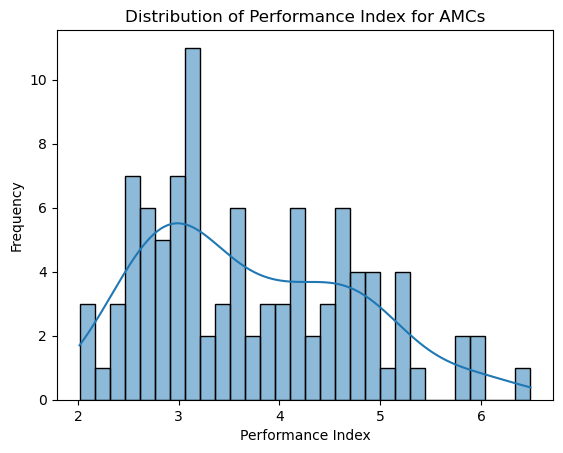

In [560]:
sns.histplot(df_amc['Performance_Index'], bins=30, kde=True)
plt.title('Distribution of Performance Index for AMCs')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

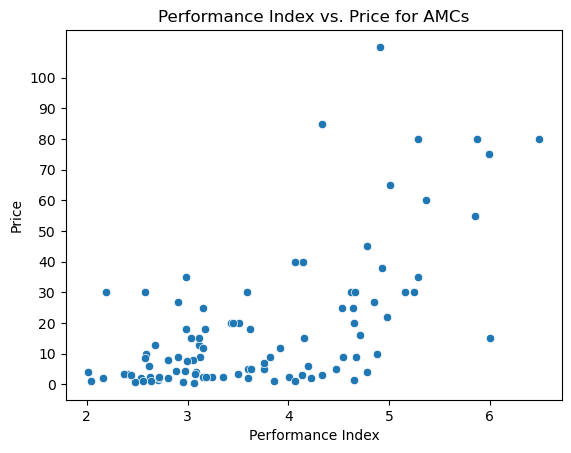

In [561]:
import math

sns.scatterplot(x='Performance_Index', y='price', data=df_amc)
plt.title('Performance Index vs. Price for AMCs')
plt.xlabel('Performance Index')
plt.ylabel('Price')
plt.yticks([x for x in range(0, math.ceil(df_amc['price'].max()), 10)])
plt.show()

Central Forwards -- Data Discovery 

In [562]:
from sklearn.preprocessing import StandardScaler

df_cf['league_score'] = df_cf['league'].map(league_scores)

# Metrics for Centre-Forwards
metrics_cf = [
    'non-penalty-goals', 'non-penalty-xg', 'shots-total','assists' ,
    'xag', 'touches-(att-pen)', 'shots-total','npxg-+-xag', 'shot-creating-actions'
]

# Including 'league_score' in the features
features_cf = metrics_cf + ['league_score']

# Standardizing the metrics
scaler = StandardScaler()
df_cf_scaled = scaler.fit_transform(df_cf[features_cf])

# Correcting the DataFrame reference for Performance Index calculation
df_cf['Performance_Index'] = np.mean(df_cf_scaled, axis=1) + df_cf['league_score']

/var/folders/1c/zx3m91hj2tjd98w1vq1z5bhr0000gn/T/ipykernel_99019/3116518017.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Performance_Index', y='non-penalty-goals', data=df_cf,  palette='Set1')


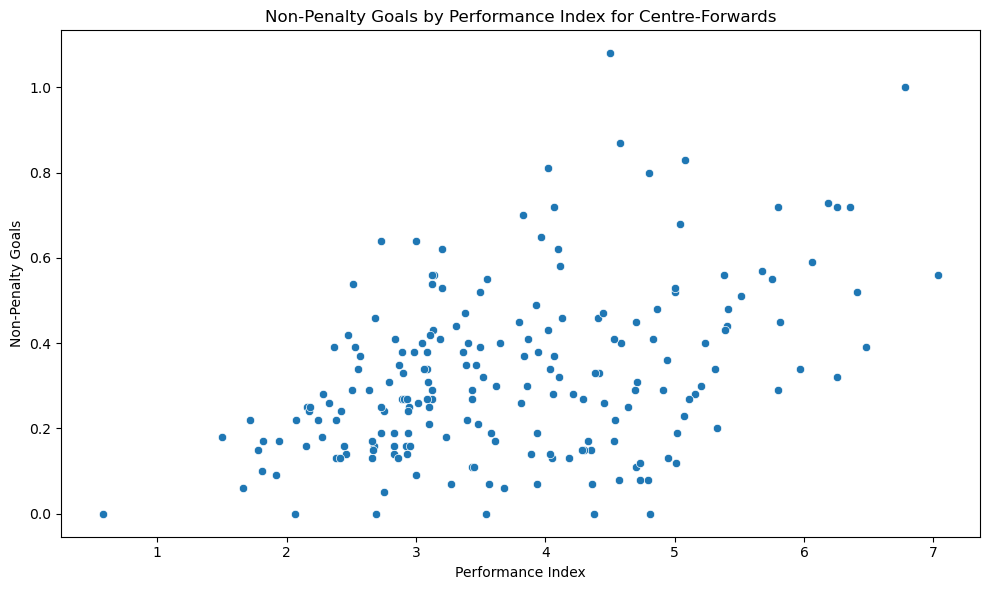

In [563]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Performance_Index', y='non-penalty-goals', data=df_cf,  palette='Set1')
plt.title('Non-Penalty Goals by Performance Index for Centre-Forwards')
plt.xlabel('Performance Index')
plt.ylabel('Non-Penalty Goals')

plt.tight_layout()
plt.show()

/var/folders/1c/zx3m91hj2tjd98w1vq1z5bhr0000gn/T/ipykernel_99019/3426978741.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Performance_Index', y='non-penalty-xg', data=df_cf,  palette='coolwarm')


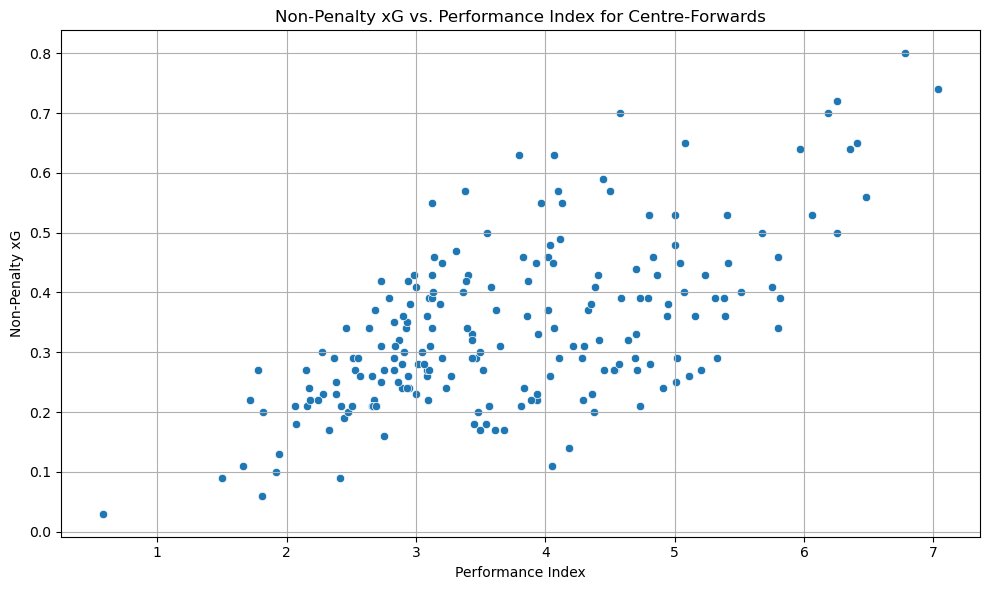

In [564]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Performance_Index', y='non-penalty-xg', data=df_cf,  palette='coolwarm')
plt.title('Non-Penalty xG vs. Performance Index for Centre-Forwards')
plt.xlabel('Performance Index')
plt.ylabel('Non-Penalty xG')

plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/1c/zx3m91hj2tjd98w1vq1z5bhr0000gn/T/ipykernel_99019/3741903891.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='non-penalty-goals', y='price', data=df_cf, palette='tab10')


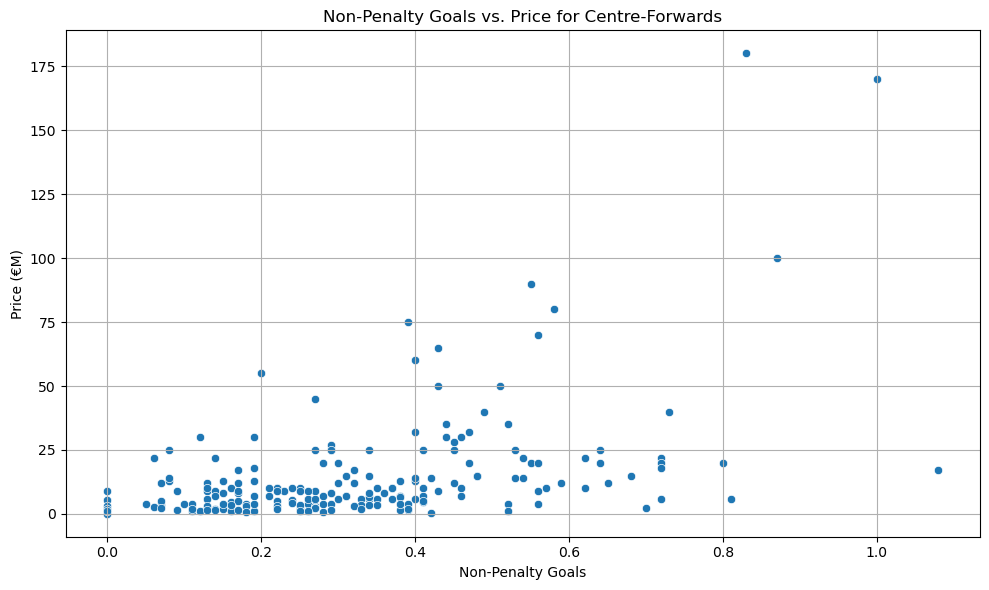

In [565]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='non-penalty-goals', y='price', data=df_cf, palette='tab10')
plt.title('Non-Penalty Goals vs. Price for Centre-Forwards')
plt.xlabel('Non-Penalty Goals')
plt.ylabel('Price (€M)')

plt.grid(True)
plt.tight_layout()
plt.show()

## Centre Backs Data Visualization and Discovery 

In [566]:
df_cb['league_score'] = df_cb['league'].map(league_scores)

# Metrics for Centre-Forwards
metrics_cb = [
   'tackles', 'interceptions', 'blocks', 'clearances',
    'aerials-won', 'passes-attempted', 'pass-completion-%','progressive-passes','progressive-carries'
]

# Including 'league_score' in the features
features_cb = metrics_cb + ['league_score']

# Standardizing the metrics
scaler = StandardScaler()
df_cb_scaled = scaler.fit_transform(df_cb[features_cb])

# Correcting the DataFrame reference for Performance Index calculation
df_cb['Performance_Index'] = np.mean(df_cb_scaled, axis=1) + df_cb['league_score']

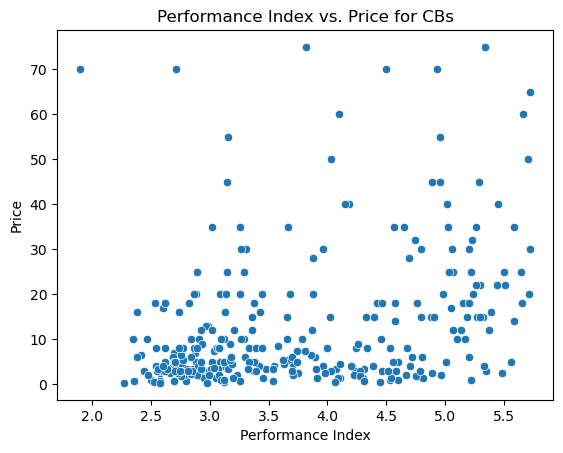

In [567]:
sns.scatterplot(x='Performance_Index', y='price', data=df_cb)
plt.title('Performance Index vs. Price for CBs')
plt.xlabel('Performance Index')
plt.ylabel('Price')
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


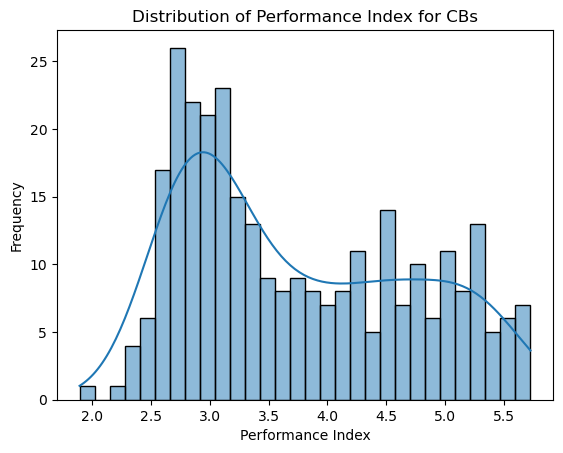

In [568]:
sns.histplot(df_cb['Performance_Index'], bins=30, kde=True)
plt.title('Distribution of Performance Index for CBs')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

## Linear regression -- Attacking Midfielders

In [569]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_amc[['Performance_Index']]
y = df_amc['price']  # Target variable

# Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

df_amc['expected_price'] = model.predict(df_amc[['Performance_Index']])
df_amc['underrated_score'] = df_amc['expected_price'] - df_amc['price']

undervalued_players = df_amc[df_amc['underrated_score'] > 0].sort_values(by='underrated_score', ascending=False)
undervalued_players.head(10)

,name,age,league,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,...,price,progressive-carries,progressive-passes-rec,npxg-+-xag,touches-(att-pen),shots-total,league_score,Performance_Index,expected_price,underrated_score
1681,Cole Palmer,21.0,EPL,0.00,0.27,0.18,0.11,3.90,45.35,86.3,...,15.0,6.91,9.04,0.37,7.62,2.66,5.0,5.997188,48.372688,33.372688
153,Adam Lallana,35.0,EPL,0.25,0.11,0.12,0.12,2.74,39.52,82.6,...,1.5,1.25,5.36,0.24,4.11,1.00,5.0,4.650957,30.108782,28.608782
1763,David Silva,37.0,LaLiga,0.12,0.16,0.20,0.15,3.82,55.88,84.8,...,4.0,3.31,5.78,0.31,3.38,1.30,4.5,4.782618,31.894991,27.894991
186,Iker Muniain,30.0,LaLiga,0.00,0.16,0.16,0.21,5.75,59.15,80.2,...,10.0,2.66,5.49,0.37,2.13,1.49,4.5,4.880677,33.225329,23.225329
291,Óscar Trejo,35.0,LaLiga,0.08,0.08,0.17,0.14,4.32,42.17,80.7,...,3.0,2.35,4.62,0.21,3.02,0.97,4.5,4.337338,25.854018,22.854018
52,Rémy Cabella,33.0,Ligue1,0.25,0.30,0.36,0.38,6.45,62.88,79.2,...,5.0,4.03,8.63,0.68,4.85,1.50,3.0,4.467933,27.625751,22.625751
212,Dimitri Payet,36.0,Ligue1,0.30,0.24,0.30,0.35,5.43,57.04,74.7,...,2.0,2.37,9.67,0.58,4.05,2.86,3.0,4.223405,24.308321,22.308321
48,Facundo Buonanotte,18.0,EPL,0.16,0.22,0.16,0.08,2.23,30.90,80.9,...,9.0,1.43,6.69,0.30,3.03,1.75,5.0,4.668531,30.347211,21.347211
1614,Iván Martín,24.0,LaLiga,0.17,0.14,0.17,0.12,1.93,38.13,84.1,...,1.0,1.70,4.65,0.27,2.04,1.02,4.5,4.066087,22.174040,21.174040
1710,Reinier,21.0,LaLiga,0.28,0.18,0.14,0.08,2.64,34.50,79.8,...,3.0,1.81,3.76,0.25,2.78,1.39,4.5,4.136334,23.127053,20.127053


In [570]:
# evalute model
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the target variable on the test set
y_pred = model.predict(X_test)

# Assuming y_test and y_pred have been defined through model prediction on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R²: {test_r2}")

Test MSE: 512.389092717282
Test R²: 0.1794972548766416


In [571]:
# Adjusting the feature set to include the Performance Index and age
X = df_amc[['Performance_Index', 'age']]
y = df_amc['price']  # Target variable remains the same

# Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize and train the Linear Regression model with the adjusted features
model = LinearRegression()
model.fit(X_train, y_train)

# Identifying undervalued players, with an emphasis on younger talents
undervalued_players = df_amc[(df_amc['Performance_Index'] > 0) & (df_amc['age'] < 24) & (df_amc['price'] < 15.0 )].sort_values(by='Performance_Index', ascending=False)

# Displaying top 10 undervalued young players
undervalued_players.head(10)

,name,age,league,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,...,price,progressive-carries,progressive-passes-rec,npxg-+-xag,touches-(att-pen),shots-total,league_score,Performance_Index,expected_price,underrated_score
48,Facundo Buonanotte,18.0,EPL,0.16,0.22,0.16,0.08,2.23,30.90,80.9,...,9.0,1.43,6.69,0.30,3.03,1.75,5.0,4.668531,30.347211,21.347211
1673,Aimar Oroz,21.0,LaLiga,0.09,0.13,0.27,0.13,3.44,36.66,79.1,...,6.0,1.56,6.44,0.25,2.46,0.98,4.5,4.195158,23.925107,17.925107
1710,Reinier,21.0,LaLiga,0.28,0.18,0.14,0.08,2.64,34.50,79.8,...,3.0,1.81,3.76,0.25,2.78,1.39,4.5,4.136334,23.127053,20.127053
310,Rodrigo Zalazar,23.0,Bundesliga,0.07,0.21,0.41,0.31,4.29,29.23,59.0,...,3.5,1.77,3.20,0.51,2.73,2.59,3.5,3.498929,14.479579,10.979579
90,Kamory Doumbia,20.0,Ligue1,0.08,0.23,0.16,0.23,3.19,41.92,79.6,...,2.5,2.26,6.39,0.45,2.88,1.95,3.0,3.239905,10.965476,8.465476
175,Aïman Maurer,18.0,Other,0.00,0.22,0.18,0.27,2.34,22.46,69.6,...,0.5,3.77,7.19,0.49,4.31,1.98,3.0,3.066825,8.617353,8.117353
1661,Felix Nmecha,22.0,Bundesliga,0.15,0.13,0.25,0.16,2.45,34.61,75.6,...,8.0,1.13,2.65,0.30,1.96,1.81,3.5,3.049900,8.387731,0.387731
1740,Lazar Samardzic,21.0,SerieA,0.24,0.12,0.19,0.18,4.77,43.49,80.1,...,7.5,1.66,3.17,0.30,1.85,2.44,3.0,2.992232,7.605379,0.105379
1753,Romano Schmid,23.0,Bundesliga,0.06,0.09,0.18,0.12,2.90,44.41,74.8,...,4.5,2.01,4.97,0.21,2.01,1.07,3.5,2.971558,7.324895,2.824895
1694,Julien Ponceau,22.0,Ligue1,0.05,0.10,0.22,0.16,2.72,45.68,82.3,...,2.5,2.88,5.60,0.26,2.34,0.76,3.0,2.720505,3.918936,1.418936


In [572]:
# evalute model
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the target variable on the test set
y_pred = model.predict(X_test)

# Assuming y_test and y_pred have been defined through model prediction on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R²: {test_r2}")

Test MSE: 436.13167442806906
Test R²: 0.30161035590013074


In [573]:
from sklearn.model_selection import cross_val_score

# Cross-validated MSE
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_mse.mean()
print(f"Cross-Validated MSE: {cv_mse}")

# Cross-validated R²
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2 = cv_r2.mean()
print(f"Cross-Validated R²: {cv_r2}")

Cross-Validated MSE: 302.26708380808736
Cross-Validated R²: 0.3155742178156702


## Naive Bayes -- Central Forwards 

In [574]:
# Define undervalued players as those in the bottom 25% of prices within similar performance index quartiles
df_cf['PI_Quartile'] = pd.qcut(df_cf['Performance_Index'], 4, labels=False)
df_cf['Price_Quartile'] = df_cf.groupby('PI_Quartile')['price'].transform(lambda x: pd.qcut(x, 4, labels=False, duplicates='drop'))

# Mark players in the lowest price quartile within each performance index quartile as undervalued
df_cf['Undervalued'] = (df_cf['Price_Quartile'] == 0).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['Performance_Index', 'age'] 
X = df_cf[features]
y = df_cf['Undervalued']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (Naive Bayes with continuous features like GaussianNB benefits from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [575]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7073170731707317
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        26
           1       1.00      0.20      0.33        15

    accuracy                           0.71        41
   macro avg       0.84      0.60      0.57        41
weighted avg       0.80      0.71      0.64        41



In [576]:
from sklearn.model_selection import cross_val_score

# Features and target variable
X = df_cf[features]
y = df_cf['Undervalued']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-validated accuracy
cv_accuracy = cross_val_score(gnb, X_scaled, y, cv=5, scoring='accuracy')

# Cross-validated precision and recall for class '1' (Undervalued)
cv_precision = cross_val_score(gnb, X_scaled, y, cv=5, scoring='precision')
cv_recall = cross_val_score(gnb, X_scaled, y, cv=5, scoring='recall')

print(f"Cross-Validated Accuracy: {cv_accuracy.mean()}")
print(f"Cross-Validated Precision (Undervalued): {cv_precision.mean()}")
print(f"Cross-Validated Recall (Undervalued): {cv_recall.mean()}")

Cross-Validated Accuracy: 0.7919512195121952
Cross-Validated Precision (Undervalued): 0.7666666666666666
Cross-Validated Recall (Undervalued): 0.3454545454545455


In [577]:
X_scaled = scaler.transform(X)  # Ensure 'X' is scaled using the same scaler as the training data
probabilities = gnb.predict_proba(X_scaled)[:, 1]  # Probability of being undervalued
df_cf['undervalued_prob'] = probabilities

top_10_undervalued = df_cf[df_cf['price'] < 25.0].sort_values(by='Performance_Index', ascending=False).head(10)
print("Top 10 Undervalued Players:")
print(top_10_undervalued[['name', 'age', 'league', 'price', 'Performance_Index']])

Top 10 Undervalued Players:
                  name   age league  price  Performance_Index
958        Deniz Undav  26.0    EPL    6.0           6.356122
812  Kelechi Iheanacho  26.0    EPL   17.0           6.254077
973      Callum Wilson  31.0    EPL   18.0           6.251340
783         Jhon Durán  19.0    EPL   12.0           6.064439
795    Roberto Firmino  31.0    EPL   22.0           5.798896
970      Danny Welbeck  32.0    EPL    8.0           5.795870
793      Evan Ferguson  18.0    EPL   10.0           5.674777
842    Anthony Martial  27.0    EPL   15.0           5.410817
932    Antoine Semenyo  23.0    EPL    9.0           5.392778
938        Ellis Simms  22.0    EPL    4.0           5.383931


In [578]:
top_10_undervalued_u27 = df_cf[(df_cf['age'] < 27) & (df_cf['price'] < 35.0)].sort_values(by='Performance_Index', ascending=False).head(10)
print("Top 10 Undervalued U-27 Players:")
print(top_10_undervalued_u27[['name', 'age', 'league', 'price', 'Performance_Index']])

Top 10 Undervalued U-27 Players:
                     name   age  league  price  Performance_Index
958           Deniz Undav  26.0     EPL    6.0           6.356122
812     Kelechi Iheanacho  26.0     EPL   17.0           6.254077
783            Jhon Durán  19.0     EPL   12.0           6.064439
876         Eddie Nketiah  23.0     EPL   25.0           5.967476
793         Evan Ferguson  18.0     EPL   10.0           5.674777
932       Antoine Semenyo  23.0     EPL    9.0           5.392778
938           Ellis Simms  22.0     EPL    4.0           5.383931
761           Patson Daka  24.0     EPL   20.0           5.201403
844  Jean-Philippe Mateta  25.0     EPL    9.0           5.075546
813       Nicolas Jackson  21.0  LaLiga   15.0           5.043710


In [579]:
top_10_undervalued_u23 = df_cf[(df_cf['age'] < 23) & (df_cf['price'] < 36.0)].sort_values(by='Performance_Index', ascending=False).head(10)
print("Top 10 Undervalued U-23 Players:")
print(top_10_undervalued_u23[['name', 'age', 'league', 'price', 'Performance_Index']])

Top 10 Undervalued U-23 Players:
                  name   age      league  price  Performance_Index
783         Jhon Durán  19.0         EPL   12.0           6.064439
793      Evan Ferguson  18.0         EPL   10.0           5.674777
938        Ellis Simms  22.0         EPL    4.0           5.383931
813    Nicolas Jackson  21.0      LaLiga   15.0           5.043710
948         Mathys Tel  18.0  Bundesliga   20.0           4.805344
743     Sergio Camello  22.0      LaLiga   10.0           4.537571
734     El Bilal Touré  21.0      LaLiga   10.0           4.408025
49   Jonathan Burkardt  22.0  Bundesliga   12.0           4.329020
863  Youssoufa Moukoko  18.0  Bundesliga   30.0           4.132724
722    Folarin Balogun  21.0      Ligue1   25.0           3.793025


##  Polynomial Regression on Central Forwards Data 


In [580]:
X = df_cf[['Performance_Index']]  # Add other features as needed
y = df_cf['price']  # Target variable

# Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

df_cf['expected_price'] = model.predict(df_cf[['Performance_Index']])

df_cf['underrated_score'] = df_cf['expected_price'] - df_cf['price']

undervalued_players = df_cf[df_cf['underrated_score'] > 0].sort_values(by='underrated_score', ascending=False)

In [581]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l1', alpha=0.0001, eta0=0.01, learning_rate='invscaling', power_t=0.25, random_state=42)

sgd_reg.fit(X_train, y_train)


# Predicting on the test set
y_pred = sgd_reg.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")


Test MSE: 192.2764435371533
Test R²: 0.06938879340008841


## Linear Regression -- Centre Back 

In [582]:
from sklearn.model_selection import train_test_split

y = df_cb['price']

# The features have already been standardized and the Performance Index calculated
X = df_cb[['Performance_Index']]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [583]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Including the Performance Index and league score in our features, excluding the target variable 'price'
X = df_cb[['Performance_Index']]  # Add other features as needed
y = df_cb['price']  # Target variable

# Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

df_cb['expected_price'] = model.predict(df_cb[['Performance_Index']])

df_cb['underrated_score'] = df_cb['expected_price'] - df_cb['price']

undervalued_players = df_cb[df_cb['underrated_score'] > 0].sort_values(by='underrated_score', ascending=False)


In [584]:
undervalued_players.head(10)


,name,age,tackles,interceptions,blocks,clearances,aerials-won,passes-attempted,pass-completion-%,league,price,progressive-passes,progressive-carries,league_score,Performance_Index,expected_price,underrated_score
605,Tim Ream,35.0,0.93,1.27,1.40,3.60,1.49,59.71,86.5,EPL,1.0,4.41,0.87,5.0,5.224324,19.689821,18.689821
637,Thiago Silva,38.0,1.47,1.29,1.38,4.30,2.23,74.45,90.7,EPL,2.5,3.70,0.24,5.0,5.486318,20.984450,18.484450
450,Jonny Evans,35.0,1.11,1.54,1.28,4.37,2.23,67.56,87.5,EPL,3.0,3.00,0.51,5.0,5.345861,20.290393,17.290393
693,Jawad El Yamiq,31.0,0.95,2.07,1.51,5.65,2.35,51.44,81.1,LaLiga,2.0,3.08,1.18,4.5,4.967250,18.419509,16.419509
409,Jorge Cuenca,23.0,1.60,1.07,1.78,7.83,2.67,68.30,87.0,LaLiga,5.0,4.62,1.25,4.5,5.561664,21.356768,16.356768
523,Lyanco,26.0,1.83,1.53,2.29,4.96,1.91,42.56,71.7,EPL,4.0,2.67,0.99,5.0,5.333670,20.230152,16.230152
448,Bernardo Espinosa,33.0,0.44,0.88,1.25,5.14,3.89,67.08,88.9,LaLiga,1.5,2.64,0.59,4.5,4.810328,17.644087,16.144087
361,Pedro Bigas,33.0,1.65,1.47,1.11,4.23,1.87,46.92,80.1,LaLiga,1.0,3.70,0.85,4.5,4.597280,16.591323,15.591323
582,Cenk Özkacar,22.0,1.78,0.79,0.92,3.10,3.23,50.70,84.0,LaLiga,1.8,4.02,1.52,4.5,4.756655,17.378866,15.578866
422,Craig Dawson,33.0,0.80,0.76,1.69,4.22,2.02,52.13,82.9,EPL,2.5,2.61,0.21,5.0,4.886420,18.020089,15.520089


In [585]:
undervalued_players_23= df_cb[(df_cb['underrated_score'] > 0)& (df_cb['age'] < 23.0)].sort_values(by='underrated_score', ascending=False)

undervalued_players_23.head(10)

,name,age,tackles,interceptions,blocks,clearances,aerials-won,passes-attempted,pass-completion-%,league,price,progressive-passes,progressive-carries,league_score,Performance_Index,expected_price,underrated_score
582,Cenk Özkacar,22.0,1.78,0.79,0.92,3.10,3.23,50.70,84.0,LaLiga,1.8,4.02,1.52,4.5,4.756655,17.378866,15.578866
1489,John Donald,22.0,1.65,1.15,1.15,1.90,2.31,35.19,83.4,LaLiga,0.4,1.90,0.25,4.5,4.067500,13.973449,13.573449
491,Kaiky,19.0,0.77,1.70,2.79,4.34,0.93,34.70,81.3,LaLiga,5.0,1.70,1.08,4.5,4.602348,16.616366,11.616366
583,Jon Pacheco,22.0,1.04,0.99,0.88,2.74,2.47,70.88,89.2,LaLiga,6.0,3.83,1.31,4.5,4.719877,17.197129,11.197129
698,Tanguy Zoukrou,20.0,2.47,0.35,3.17,4.23,1.23,38.92,86.4,Ligue1,0.3,1.94,0.00,3.0,2.976669,8.583173,8.283173
642,Nikola Soldo,22.0,2.28,1.06,1.06,4.25,1.06,52.82,77.6,Bundesliga,1.5,2.28,0.46,3.5,3.197310,9.673454,8.173454
551,Bamo Meïté,21.0,1.08,0.96,1.98,4.19,1.80,56.05,89.5,Ligue1,1.5,1.92,0.60,3.0,2.948002,8.441517,6.941517
383,Ousmane Camara,20.0,1.73,1.90,0.69,2.59,1.73,62.71,90.9,Ligue1,2.0,2.76,0.52,3.0,2.914634,8.276630,6.276630
569,Tanguy Nianzou,20.0,1.48,1.14,0.62,2.67,1.86,47.67,87.9,LaLiga,9.0,3.81,0.29,4.5,4.260405,14.926677,5.926677
598,Lorenzo Pirola,21.0,1.53,1.39,2.32,3.94,2.23,45.86,79.9,Other,3.0,1.99,0.60,3.0,2.991854,8.658205,5.658205


In [586]:
undervalued_players_27 = df_cb[(df_cb['underrated_score'] > 0)& (df_cb['age'] < 27.0)].sort_values(by='underrated_score', ascending=False)

undervalued_players_27.head(10)

,name,age,tackles,interceptions,blocks,clearances,aerials-won,passes-attempted,pass-completion-%,league,price,progressive-passes,progressive-carries,league_score,Performance_Index,expected_price,underrated_score
409,Jorge Cuenca,23.0,1.60,1.07,1.78,7.83,2.67,68.30,87.0,LaLiga,5.0,4.62,1.25,4.5,5.561664,21.356768,16.356768
523,Lyanco,26.0,1.83,1.53,2.29,4.96,1.91,42.56,71.7,EPL,4.0,2.67,0.99,5.0,5.333670,20.230152,16.230152
582,Cenk Özkacar,22.0,1.78,0.79,0.92,3.10,3.23,50.70,84.0,LaLiga,1.8,4.02,1.52,4.5,4.756655,17.378866,15.578866
587,Aitor Paredes,23.0,0.73,1.47,1.15,2.72,2.20,54.59,89.1,LaLiga,0.4,3.46,0.42,4.5,4.450404,15.865542,15.465542
553,Jorge Meré,26.0,1.65,0.90,1.35,4.79,2.25,32.20,83.3,LaLiga,1.5,2.10,0.15,4.5,4.300965,15.127101,13.627101
552,Chris Mepham,25.0,1.84,1.23,1.64,6.22,2.17,42.61,83.6,EPL,6.0,1.72,0.08,5.0,5.207908,19.608702,13.608702
1489,John Donald,22.0,1.65,1.15,1.15,1.90,2.31,35.19,83.4,LaLiga,0.4,1.90,0.25,4.5,4.067500,13.973449,13.573449
625,Javi Sánchez,26.0,1.62,1.73,1.20,4.36,1.73,44.21,81.9,LaLiga,3.0,2.78,0.79,4.5,4.587392,16.542461,13.542461
1175,Óscar Mingueza,24.0,2.59,0.84,0.70,1.75,0.56,63.64,79.4,LaLiga,3.0,4.84,1.68,4.5,4.511926,16.169553,13.169553
404,Eray Cömert,25.0,1.88,1.56,1.24,4.09,2.37,50.87,86.2,LaLiga,4.0,2.91,0.32,4.5,4.705117,17.124194,13.124194


In [587]:
if np.any(np.abs(model.coef_) > 1e+10):
    print("Model has extremely large coefficients, indicating potential instability.")


In [588]:
from sklearn.metrics import mean_squared_error, r2_score

# Check if `y_test` contains NaN or infinite values
if np.any(np.isnan(y_test)) or np.any(np.isinf(y_test)):
    print("y_test contains NaN or infinite values.")

# Predict on the test set
y_pred_test = model.predict(X_test)


# Calculate the MSE and R² score
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

Test MSE: 199.30040740336125
Test R²: 0.17544843139630661


In [589]:
from sklearn.model_selection import cross_val_score

# Make sure to scale your features for linear models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Linear Regression model
model = LinearRegression()

# Perform 5-Fold Cross-Validation
scores_mse = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error', cv=5)
scores_r2 = cross_val_score(model, X_scaled, y, scoring='r2', cv=5)

# Calculate average MSE and R²
avg_mse = -scores_mse.mean() 
avg_r2 = scores_r2.mean()

print(f"Average MSE from Cross-Validation: {avg_mse}")
print(f"Average R² from Cross-Validation: {avg_r2}")

Average MSE from Cross-Validation: 196.17697154589
Average R² from Cross-Validation: 0.0980438249743905
